É favor correr as células na ordem que aparecem para evitar ambiguidades na execução do código.

# Exercício 1


# 1. a)

In [1]:
import numpy as np
import pylab as p
from scipy.optimize import curve_fit

def g(x,z):
    a = (1/(2*np.pi))*(1/(z**2+1)**(3/2))              # função integranda, retorna um array com as componentes 
    return a*np.array([-np.cos(x),-np.sin(x),z])       # a integrar em x.

def simpson(a,b,N,z):                                  # definição de uma função que aplica a regra de simpson 
    h = (b-a)/N                                        # à função g(x,z).
    odds = [0,0,0]
    evens = [0,0,0]
    for i in range(1,N,2):
        odds += g(a+i*h,z)
    for i in range(2,N,2):
        evens+=g(a+i*h,z)
    return (1/3)*h*(g(a,z)+g(b,z)+4*odds+2*evens)

N = 20
z = 1
print(simpson(0,2*np.pi,N,z))

[  1.45327854e-17  -4.36985407e-18   3.53553391e-01]


# b)

# Gráfico do desvio da componente z em função de h


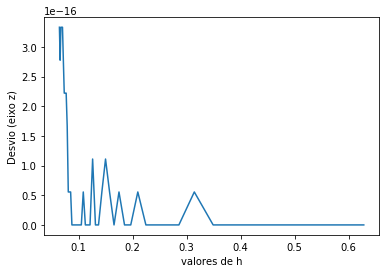

In [2]:
z = 1
exato = z/((z**2+1)**(3/2))   # valor exato da componente zz do campo em z = 1
def f(x,z):                                    # definição da função a integrar em zz
    a = (1/(2*np.pi))*(1/(z**2+1)**(3/2))
    return a*z
    
    
def comp_z(a,b,N,z):                           # definição de uma função que aplica a regra de simpson a g, retornando
    h = (b-a)/N                                # um valor real
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += f(a+i*h,z)
    for i in range(2,N,2):
        evens+=f(a+i*h,z)
    return (1/3)*h*(f(a,z)+f(b,z)+4*odds+2*evens)


N = np.arange(10,100,2)    # array de valores de N.
h = 2*np.pi/N              # array de valores de h.
y = np.zeros(len(N))
for i in range(len(N)):                                # ciclo que cria um array com os valores do desvio para cada h
    y[i] = np.abs(comp_z(0,2*np.pi,N[i],z)-exato)

p.plot(h,y)  
p.xlabel('valores de h')
p.ylabel('Desvio (eixo z)')
p.show()

No gráfico acima, podemos reparar que todos os valores do desvio se encontram muito próximo de zero (a escala do desvio é de 1e(-16), sendo precisamente a precisão máxima do python). Isto deve-se ao facto de a função que integramos não depender de $ \theta $, fazendo com que o método usado seja bastante preciso na integração, visto que se trata de integrar uma constante.

# Gráfico do desvio da componente x em função de h

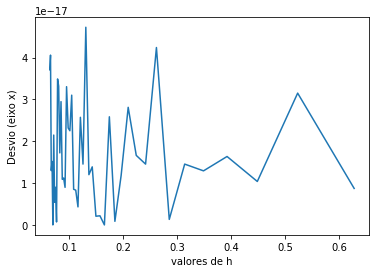

In [3]:
z = 1
exato = 0
def f(x,z):                                  # a estrutura é semelhante ao código anterior.
    a = (1/(2*np.pi))*(1/(z**2+1)**(3/2))
    return a*(-np.cos(x))
    
    
def comp_x(a,b,N,z):
    h = (b-a)/N
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += f(a+i*h,z)
    for i in range(2,N,2):
        evens+=f(a+i*h,z)
    return (1/3)*h*(f(a,z)+f(b,z)+4*odds+2*evens)


N = np.arange(10,100,2)
h = 2*np.pi/N
y = np.zeros(len(N))
for i in range(len(N)):
    y[i] = np.abs(comp_x(0,2*np.pi,N[i],z)-exato)
p.plot(h,y)  
p.xlabel('valores de h')
p.ylabel('Desvio (eixo x)')
p.show()

O mesmo acontece aqui, visto que agora a função integranda tem um termo $ cos(\theta) $ que, como é uma função simétrica no intervalo $ [0, 2\pi] $, os termos do sumatório de simpson cancelam-se mutuamente ( a menos do erro da máquina). 

# Gráfico do desvio da componente y em função de h

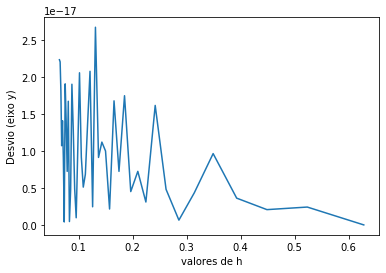

In [4]:
z = 1
exato = 0
def f(x,z):
    a = (1/(2*np.pi))*(1/(z**2+1)**(3/2))
    return a*(-np.sin(x))
    
    
def comp_y(a,b,N,z):
    h = (b-a)/N
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += f(a+i*h,z)
    for i in range(2,N,2):
        evens+=f(a+i*h,z)
    return (1/3)*h*(f(a,z)+f(b,z)+4*odds+2*evens)


N = np.arange(10,100,2)
h = 2*np.pi/N
y = np.zeros(len(N))
for i in range(len(N)):
    y[i] = np.abs(comp_y(0,2*np.pi,N[i],z)-exato)
p.plot(h,y)  
p.xlabel('valores de h')
p.ylabel('Desvio (eixo y)')
p.show()

visto que agora a dependência é em $sen(\theta)$, a mesma explicação da questão anterior aplica-se aqui.

# c) 

# Gráfico do desvio da componente z em função de h

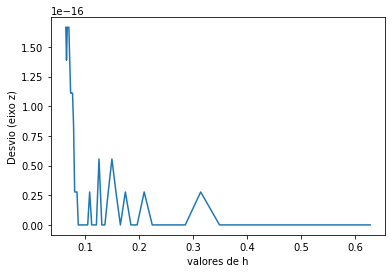

In [5]:
z = 1
exato = 0.5*z/((z**2+1)**(3/2))   
def f(x,z):                                    
    a = (1/(2*np.pi))*(1/(z**2+1)**(3/2))
    return a*z
    
    
def comp_z(a,b,N,z):                          
    h = (b-a)/N                               
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += f(a+i*h,z)
    for i in range(2,N,2):
        evens+=f(a+i*h,z)
    return (1/3)*h*(f(a,z)+f(b,z)+4*odds+2*evens)


N = np.arange(10,100,2)    
h = 2*np.pi/N              
y = np.zeros(len(N))
for i in range(len(N)):      
    y[i] = np.abs(comp_z(0,np.pi,N[i],z)-exato)

p.plot(h,y)  
p.xlabel('valores de h')
p.ylabel('Desvio (eixo z)')
p.show()

Visto que a função continua constante, a mesma explicação aplica-se neste caso ao observarmos que o desvio continua muito próximo de 0.

# Gráfico do desvio da componente x em função de h

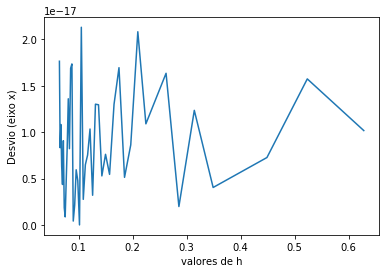

In [6]:
z = 1
exato = 0
def f(x,z):                                
    a = (1/(2*np.pi))*(1/(z**2+1)**(3/2))
    return a*(-np.cos(x))
    
    
def comp_x(a,b,N,z):
    h = (b-a)/N
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += f(a+i*h,z)
    for i in range(2,N,2):
        evens+=f(a+i*h,z)
    return (1/3)*h*(f(a,z)+f(b,z)+4*odds+2*evens)


N = np.arange(10,100,2)
h = 2*np.pi/N
y = np.zeros(len(N))
for i in range(len(N)):
    y[i] = np.abs(comp_x(0,np.pi,N[i],z)-exato)
p.plot(h,y)  
p.xlabel('valores de h')
p.ylabel('Desvio (eixo x)')
p.show()

Como a função $ cos(\theta)$ é também simétrica no intervalo $ [0, \pi]$, a mesma explicação aplica-se ao observarmos que o desvio continua muito próximo de 0.

# Gráfico do desvio da componente y em função de h

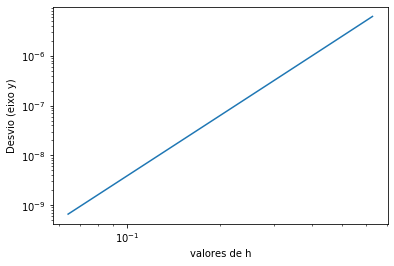

In [7]:
z = 1
exato = -1/(np.pi*(z**2+1)**(3/2))
def f(x,z):
    a = (1/(2*np.pi))*(1/(z**2+1)**(3/2))
    return a*(-np.sin(x))
    
    
def comp_y(a,b,N,z):
    h = (b-a)/N
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += f(a+i*h,z)
    for i in range(2,N,2):
        evens+=f(a+i*h,z)
    return (1/3)*h*(f(a,z)+f(b,z)+4*odds+2*evens)


N = np.arange(10,100,2)
h = 2*np.pi/N
y = np.zeros(len(N))
for i in range(len(N)):
    y[i] = np.abs(comp_y(0,np.pi,N[i],z)-exato)
z = np.array(y)
p.plot(h,z)  
p.xscale('log')
p.yscale('log')
p.xlabel('valores de h')
p.ylabel('Desvio (eixo y)')
p.show()

Neste caso, visto que a função $ sin(\theta)$ não é simétrica em $[0, \pi]$, podemos observar o comportamento do desvio em função do tamanho de h. Neste caso, como era de esperar, vemos que o desvio diminui com a diminuição de h, como seria de esperar, pois um menor h significa a divisão do intervalo de intregação em bocados mais pequenos, permitindo uma melhor avaliação da integral em todos os pontos e por isso aumentando a precisão. Como o erro da regra de simpson varia com $h^4$, ao representar este gráfico numa escala logarítmica, obtemos uma reta.

# 2. a)

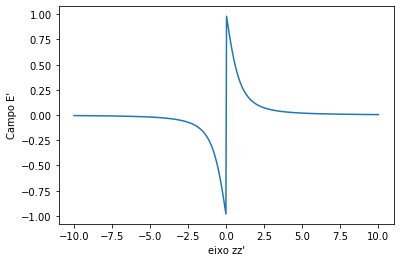

In [8]:

def simpson(a,b,N,z):                   # definição de uma função que aplica a regra de simpson a uma função g(),
    h = (b-a)/N                         # retornando um número.
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += g(a+i*h,z)
    for i in range(2,N,2):
        evens+=g(a+i*h,z)
    return (1/3)*h*(g(a,z)+g(b,z)+4*odds+2*evens)




def g(r,z):                               # definição da função integranda no eixo dos zz'
    return r*z/((z**2+r**2)**(3/2))
z = np.linspace(-10,10,500)
E = simpson(0,1,200,z)


p.plot(z,E)
p.xlabel('eixo zz\'')
p.ylabel('Campo E\'')
p.show()

# b)

a =  0.489513519846
b =  1.98749879859
c =  0.673968763264


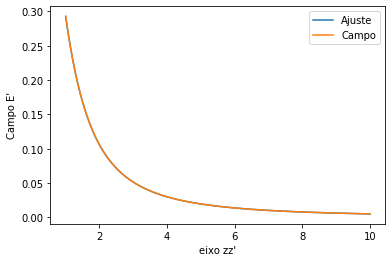

In [9]:

def f(x,a,b,c):                # definição de uma função modelo para descobrir os valores de a, b e c para o qual
    return a / ((x**b)+c)      # a função do campo melhor se adequa no intervalo [1, 10]

z = np.linspace(1,10,500)
E = simpson(0,1,200,z)
popt, pcov = curve_fit(f,z,E)  # usar a função curve_fit para obter o ajuste
print('a = ',popt[0])          # print dos coeficientes obtidos pelo ajuste
print('b = ',popt[1])
print('c = ',popt[2])
Eajuste = f(z,popt[0],popt[1],popt[2])
p.plot(z,Eajuste, label = 'Ajuste')
p.plot(z,E, label = 'Campo')
p.xlabel('eixo zz\'')
p.ylabel('Campo E\'')
p.legend()
p.show()

Neste caso,usando uma função de ajuste do tipo   $ f(x) = \frac{a}{x^{b}+c}$, descobrimos que b é muito próximo de 2, confirmando a teoria de que o campo cai com o quadrado da distância na direção do eixo dos zz. Vemos facilmente pelo gráfico que o ajuste e o campo se encontram sobrepostos, indicando que se trata de um ótimo ajuste. Visto que, para uma distância grande o suficiente para que R seja desprezável, o disco pode ser aproximado a uma carga pontual em qualquer direção, o campo decairá com o quadrado da distância seja qual for a direção.

# c)

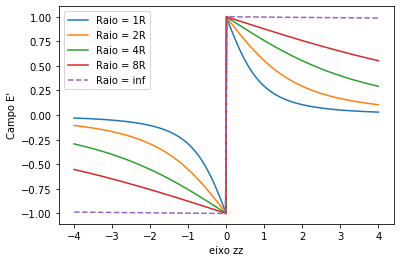

In [10]:

z = np.linspace(-4,4,1000)
y1= simpson(0,1,1000,z)
y2= simpson(0,2,1000,z)
y3= simpson(0,4,1000,z)
y4= simpson(0,8,1000,z)
y5= simpson(0,300,10000,z)

p.plot(z,y1,label = 'Raio = 1R')
p.plot(z,y2,label = 'Raio = 2R')
p.plot(z,y3,label = 'Raio = 4R')
p.plot(z,y4,label = 'Raio = 8R')
p.plot(z,y5,'--',label = 'Raio = inf')
p.xlabel('eixo zz')
p.ylabel('Campo E\'')
p.legend()
p.show()


Pelo gráfico, podemos ver que à medida que o raio aumenta, o campo tende para um campo uniforme que não depende de z, tal como previsto pela lei de Gauss.

# 3. a)

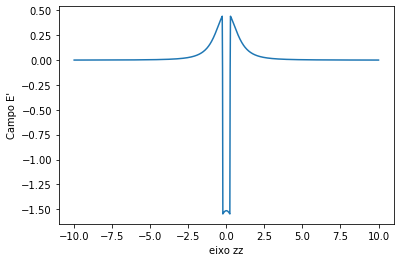

In [11]:
 z = np.linspace(-10,10,1000)
E1 = simpson(0,1,1000,z-0.5/2)
E2 = simpson(0,1,1000,z+0.5/2)
p.plot(z,E1-E2)
p.xlabel('eixo zz')
p.ylabel('Campo E\'')
p.show()

# b)

a =  0.499468165373
b =  2.99978901181
c =  39.0571563543


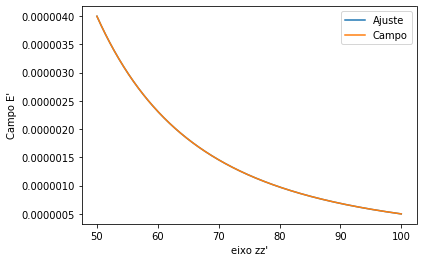

In [12]:

def f(x,a,b,c):               
    return a / ((x**b)+c)     

z = np.linspace(50,100,500)
E1 = simpson(0,1,1000,z-0.5/2)
E2 = simpson(0,1,1000,z+0.5/2)

popt, pcov = curve_fit(f,z,E1-E2) 
print('a = ',popt[0])         
print('b = ',popt[1])
print('c = ',popt[2])

Eajuste = f(z,popt[0],popt[1],popt[2])
p.plot(z,Eajuste, label = 'Ajuste')
p.plot(z,E1-E2, label = 'Campo')
p.xlabel('eixo zz\'')
p.ylabel('Campo E\'')
p.legend()
p.show()

Usando o mesmo raciocínio do da alínea 2.b, podemos ver que b é agora muito próximo de 3, sendo que a distância decai com o cubo da distância. Isto deve-se porque, para distâncias $ z >> R $, o raio é tão pequeno que podemos considerar os discos como cargas pontuais. Nisto, para distâncias grandes, o sistema pode ser aproximado a um dipolo, o que explica a dependência do campo em $z^3$.

# c)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


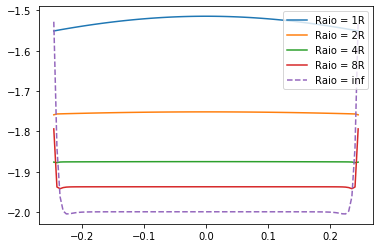

In [13]:

R = 1
z = np.linspace(-0.25,0.25,100)
y1 = - simpson(0,1,1000,z+0.5/2) +simpson(0,1,1000,z-0.5/2)
y2 = - simpson(0,2,1000,z+0.5/2)+simpson(0,2,1000,z-0.5/2)
y3 = - simpson(0,4,1000,z+0.5/2)+simpson(0,4,1000,z-0.5/2)
y4 = - simpson(0,8,1000,z+0.5/2) +simpson(0,8,1000,z-0.5/2)
y5 = - simpson(0,1000,60000,z+0.5/2) + simpson(0,1000,60000,z-0.5/2)
p.plot(z,y1, label = 'Raio = 1R')
p.plot(z,y2, label = 'Raio = 2R')
p.plot(z,y3, label = 'Raio = 4R')
p.plot(z,y4, label = 'Raio = 8R')
p.plot(z,y5,'--',label = 'Raio = inf')
p.legend()
p.show()

Com o aumento do raio dos discos, vemos que o campo entre os discos tende para constante, visto que se trata da sobreposição de dois campos constantes gerados por duas superfícies infinitas. Visto que cada um destes campos constantes têm um valor de 1, como observado na alínea 2.c), o campo aqui tenderá para o valor 2 (em amplitude).

# 4.a) Configuração d)

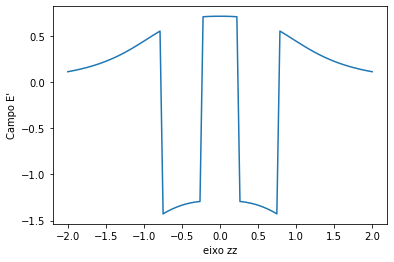

In [14]:

z = np.linspace(-2,2,100)
E1 = simpson(0,1,1000,z-0.75)  # criação de arrays com os valores dos campos gerados por cada disco de acordo  
E2 = simpson(0,1,1000,z-0.25)  # com a sua posição
E3 = simpson(0,1,1000,z+0.25)
E4 = simpson(0,1,1000,z+0.75)

p.plot(z,E1 - E2 +E3 - E4)   # sobreposição dos campos de acordo com o sinal das suas cargas
p.xlabel('eixo zz')
p.ylabel('Campo E\'')
p.show()

a =  1.00009818345
b =  3.00001948183
c =  -3.46509142311


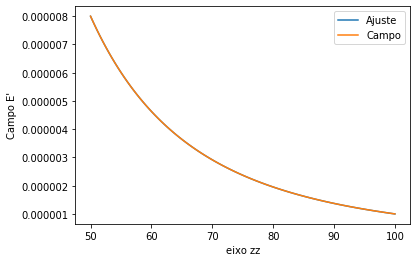

In [15]:
def f(x,a,b,c):
    return a/(x**b+c)

z = np.linspace(50,100,100)
E1 = simpson(0,1,1000,z-0.75) 
E2 = simpson(0,1,1000,z-0.25) 
E3 = simpson(0,1,1000,z+0.25)
E4 = simpson(0,1,1000,z+0.75)
popt,pcov = curve_fit(f,z,E1 - E2 +E3 - E4)
print('a = ',popt[0])
print('b = ',popt[1])
print('c = ',popt[2])
Eajuste = f(z,popt[0],popt[1],popt[2])
p.plot(z,Eajuste,label = 'Ajuste')
p.plot(z,E1 - E2 + E3 - E4,label = 'Campo')
p.xlabel('eixo zz')
p.ylabel('Campo E\'')
p.legend()
p.show()

Aqui vemos que o campo decresce com o inverso do cubo da distância, tal como um dipolo. Nesta configuração em específico, para distâncias grandes, o campo gerado pelos dois discos de dentro, como a distância entre eles é menor, será desprezável comparado ao campo gerado pelos dois de fora, comportando-se o sistema como um dipolo.

# Configuração e)

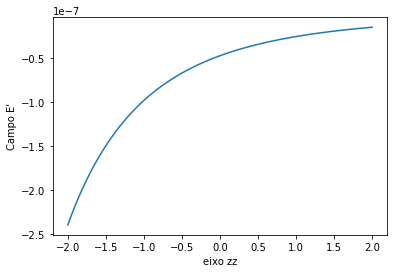

In [16]:
z = np.linspace(-2,2,100)
p.plot(z, -E1 + E2 +E3 -E4) # sobreposição dos campos de acordo com o sinal das suas cargas
p.xlabel('eixo zz')
p.ylabel('Campo E\'')
p.show()

a =  -1.49738807515
b =  3.99964674566
c =  1403.17488061


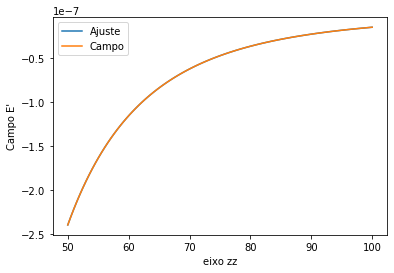

In [17]:
def f(x,a,b,c):
    return a/(x**b+c)

z = np.linspace(50,100,100)
E1 = simpson(0,1,1000,z-0.75) 
E2 = simpson(0,1,1000,z-0.25) 
E3 = simpson(0,1,1000,z+0.25)
E4 = simpson(0,1,1000,z+0.75)

popt,pcov = curve_fit(f,z,-E1 + E2 +E3 - E4)

print('a = ',popt[0])
print('b = ',popt[1])
print('c = ',popt[2])

Eajuste = f(z,popt[0],popt[1],popt[2])
p.plot(z,Eajuste,label = 'Ajuste')
p.plot(z,-E1 + E2 + E3 - E4,label = 'Campo')
p.xlabel('eixo zz')
p.ylabel('Campo E\'')
p.legend()
p.show()

Neste caso, vemos que o campo decai com o inverso da quarta potência da distância, pois podemos aproximar este sistema a um quadrupolo em $ z >> R$.

# b) configuração d)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


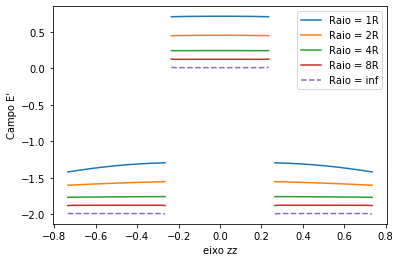

In [18]:
for i in range(4):
    z = np.linspace(-0.75,0.75,100)
    E1 = simpson(0,2**i,1000,z-0.75)
    E2 = simpson(0,2**i,1000,z-0.25)
    E3 = simpson(0,2**i,1000,z+0.25)
    E4 = simpson(0,2**i,1000,z+0.75)

    p.plot(z,E1 - E2 +E3 - E4, label ='Raio = ' + str(2**i) + 'R')
E1 = simpson(0,100,10000,z-0.75)
E2 = simpson(0,100,10000,z-0.25)
E3 = simpson(0,100,10000,z+0.25)
E4 = simpson(0,100,100000,z+0.75)
p.plot(z,E1 - E2 +E3 - E4,'--', label = 'Raio = inf')
p.xlabel('eixo zz')
p.ylabel('Campo E\'')
p.legend()
p.show()

Tal como nas alíneas anteriores, vemos que o campo tende para constante à medida que R vai para infinito.

# Configuração e)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


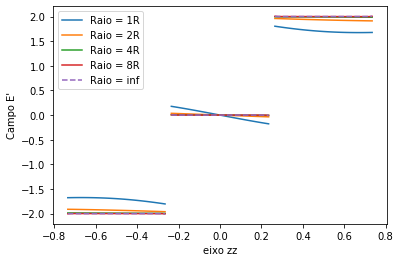

In [19]:
for i in range(4):
    z = np.linspace(-0.75,0.75,100)
    E1 = simpson(0,2**i,1000,z-0.75)
    E2 = simpson(0,2**i,1000,z-0.25)
    E3 = simpson(0,2**i,1000,z+0.25)
    E4 = simpson(0,2**i,1000,z+0.75)

    p.plot(z,-E1 + E2 +E3 - E4, label ='Raio = ' + str(2**i) + 'R')
E1 = simpson(0,100,10000,z-0.75)
E2 = simpson(0,100,10000,z-0.25)
E3 = simpson(0,100,10000,z+0.25)
E4 = simpson(0,100,100000,z+0.75)
p.plot(z,-E1 + E2 +E3 - E4,'--', label = 'Raio = inf')
p.xlabel('eixo zz')
p.ylabel('Campo E\'')
p.legend()
p.show()

Tal como nas alíneas anteriores, vemos que o campo tende para constante à medida que R vai para infinito.

## Exercício 2
# 1.

In [20]:
def simpson1(t,z,N,a,b,n):                      # definição de uma função que aplica a regra de simpson
    h = (b-a)/N                                 # à função integranda na varável r (equivalente à integração de g em r)
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += g(a+i*h,t,z,n)
    for i in range(2,N,2):
        evens+=g(a+i*h,t,z,n)
    return (1/3)*h*(g(a,t,z,n)+g(b,t,z,n)+4*odds+2*evens)

def simpson2(z,N,a,b,c,d,n):                  # definição de uma função que aplica a regra de simpson à função
    h = (d-c)/N                               # simpson1() na variável t (theta)
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds += simpson1(c+i*h,z,N,a,b,n)
    for i in range(2,N,2):
        evens+=simpson1(c+i*h,z,N,a,b,n)
    return (1/3)*h*(simpson1(c,z,N,a,b,n)+simpson1(d,z,N,a,b,n)+4*odds+2*evens)    
    

Para construir um método adaptativo, temos de saber calcular o erro do nosso processo. assim:

$ I = I_{1} + c_{x}h_{x1}^4 + c_{y}h_{y1}^4 $

$ I = I_{2} + c_{x}h_{x2}^4 + c_{y}h_{y2}^4 $

com $I$ sendo o valor exato da integral, e $I_{2}$ sendo o integral aproximado mas com o dobro dos passos dos do $I_{1}$ , sendo por isso $h_{x1} = 2h_{x2}$ e $h_{y1} = 2h_{y2}$. Ao igualar as equações e fazer esta substituição, podemos manipular algebricamente o resultado obtendo

$ c_{x}h_{x2}^4 + c_{y}h_{y2}^4 = \frac{1}{15}(I_{2} - I_{1})$

como $c_{x}h_{x2}^4 + c_{y}h_{y2}^4 = \epsilon_{2}$, podemos obter uma expressão geral para o erro $\epsilon_{i}$ de um integral $I_{i}$:

$ \epsilon_{i} = \frac{1}{15}(I_{i} - I_{i-1})$

Implemento este resultado na célula seguinte.

In [21]:
def  adapt(z,N,a,b,c,d,erro,n):          # definição de uma função adaptativa que vai dobrando o passo e avaliando
    lista = np.zeros(30)                 # integrais até que o erro seja suficientemente pequeno.
    lista[0] = simpson2(z,N,a,b,c,d,n)   
    e = 1
    i = 0
    while np.abs(e) > erro:
        i += 1
        lista[i] = simpson2(z,(2**i)*N,a,b,c,d,n)
        e = (1/15)*(lista[i]-lista[i-1])
    return lista[i]

def g(r,t,z,n):                                  # definição da função integranda (componente z do campo)
    a = np.cos(n*t)*r**2/( r**2 + z**2)
    return a*z
adapt(1,2,0,1,0,2*np.pi,10**(-5),0)

1.3483833440310624

# b) e c)

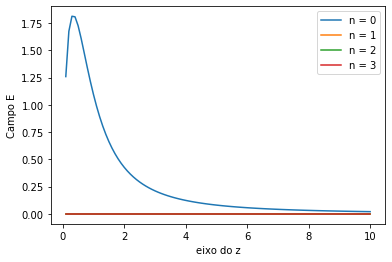

In [22]:
def g(r,t,z,n):                                  # definição da função integranda (componente z do campo)
    a = np.cos(n*t)*r**2/( r**2 + z**2)**(3/2)
    return a*z

z = np.linspace(0.1,10,100)
for i in range(4):
    E = simpson2(z,200,0,1,0,2*np.pi,i)
    p.plot(z,E,label = 'n = ' + str(i))

p.xlabel('eixo do z')
p.ylabel('Campo E')
p.legend()
p.show()

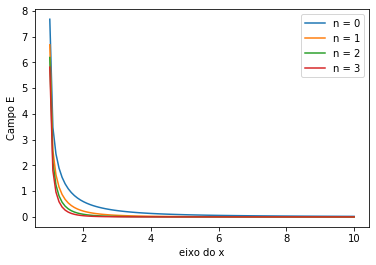

In [23]:
def g(r,t,z,n):                                             # definição da função integranda (componente x do campo)
    a = np.cos(n*t)*r**2/( r**2 + z**2 - 2*z*r*np.cos(t)  )**(3/2)
    return a*(z-r*np.cos(t))


z = np.linspace(1.01,10,100)
for i in range(4):
    E = simpson2(z,200,0,1,0,2*np.pi,i)
    p.plot(z,E,label = 'n = ' + str(i))

p.xlabel('eixo do x')
p.ylabel('Campo E')
p.legend()
p.show()
    

n =  0
a =  2.09439488854
b =  1.99999997954
c =  -0.450093831753


n =  1
a =  1.57140418262
b =  3.00007670181
c =  -14.2261870359


n =  2
a =  1.41455092729
b =  4.00011951553
c =  -480.838086338


n =  3
a =  1.30994677958
b =  5.00014926852
c =  -17623.7058487




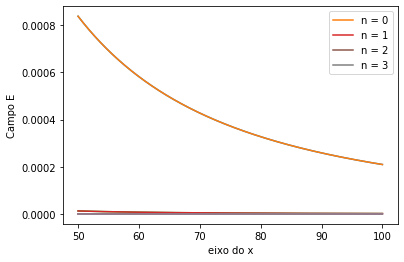

In [24]:
def f(x,a,b,c):
    return a/(x**b+c)

z = np.linspace(50,100,1000)

for i in range(4):
    E = simpson2(z,200,0,1,0,2*np.pi,i)
    

    popt,pcov = curve_fit(f,z,E)
    print('n = ',i)
    print('a = ',popt[0])
    print('b = ',popt[1])
    print('c = ',popt[2])
    print('\n')

    Eajuste = f(z,popt[0],popt[1],popt[2])
    p.plot(z,Eajuste)
    p.plot(z,E,label = 'n = '+ str(i))

p.xlabel('eixo do x')
p.ylabel('Campo E')
p.legend()
p.show()

Podemos ver que, ao longo do eixo do x, dependendo do n na equação do campo, o campo decai com o inverso de x, o inverso do quadrado de x, o inverso do cubo de x e o inverso da quarta potência de x.